In [1]:
import json
from core.analysis import *

<Figure size 432x288 with 0 Axes>

## Data Prep

In [2]:
db = access_db()

In [3]:
trials = get_trial_data(db)

In [4]:
participants = get_participant_data(db)

In [5]:
wids = [27046826551,
67313721753,
14715705020,
65643517184,
86979612220,
4949336941,
26312944991]
#Worker IDs of subjects who completed expt
wids = [str(i) for i in wids]

Getting data for users who completed the experiment

In [6]:
user_df = participants[participants['workerID'].isin(wids) & participants['completedTask'] == 1]
user_df

,userID,workerID,userIP,completedTask,timeTaken
22,-M3pVTw9ili6muvdZKg4,27046826551,-188934845,1,546.814
23,-M3qqejnlf4v_ja8eE7n,67313721753,727219182,1,526.296
29,-M3rSxyqKh87n8IxCNFz,14715705020,1146968680,1,597.604
31,-M3tou9y2NuJSM2wEped,65643517184,-15487531,1,712.426
33,-M3wWKZuvM6607THGsj3,86979612220,-1107186255,1,308.230
34,-M3xbEdg3XIZca4MA7SZ,26312944991,-1470029051,1,924.305
36,-M40VLLla6hlhfPLwyWk,4949336941,-1012892879,1,921.908


In [7]:
users = participants[participants['workerID'].isin(wids) & participants['completedTask'] == 1]['userID']
results = trials[trials['userID'].isin(users)]
results

,trialID,userID,trialIndex,trialType,prevChanged,lemma,sense,x,y
206,-M3pVhmrS4LVzC6_gIcJ,-M3pVTw9ili6muvdZKg4,1,training,1,bank_n,bank_n_01,173.0,360.0
207,-M3pVhmrS4LVzC6_gIcJ,-M3pVTw9ili6muvdZKg4,1,training,1,bank_n,bank_n_05,614.0,362.0
208,-M3pVhmrS4LVzC6_gIcJ,-M3pVTw9ili6muvdZKg4,1,training,1,bank_n,depository_financial_institution_n_01,499.0,368.0
209,-M3pVmug0DJj2iajKInK,-M3pVTw9ili6muvdZKg4,2,training,0,bass_n,bass_n_03,241.0,402.0
210,-M3pVmug0DJj2iajKInK,-M3pVTw9ili6muvdZKg4,2,training,0,bass_n,bass_n_04,723.0,324.0
...,...,...,...,...,...,...,...,...,...
643,-M40YhiKlHcx_i3m-65v,-M40VLLla6hlhfPLwyWk,17,repeat,0,heart_n,heart_n_02,342.0,311.0
644,-M40YhiKlHcx_i3m-65v,-M40VLLla6hlhfPLwyWk,17,repeat,0,heart_n,heart_n_03,238.0,385.0
645,-M40YkX-_CwazDdKJ1Rx,-M40VLLla6hlhfPLwyWk,18,repeat,0,glass_n,glass_n_01,282.0,393.0
646,-M40YkX-_CwazDdKJ1Rx,-M40VLLla6hlhfPLwyWk,18,repeat,0,glass_n,glass_n_02,207.0,393.0


## Repeat Trial Results

Original WN sense definitions(make sure to click "Show Sense Numbers" under "Display Options"): http://wordnetweb.princeton.edu/perl/webwn

Distance matrices for when a subject got the same word (2x per trial)

User 22  Correlation  0.45940746440938823
User 23  Correlation  0.7341597796143251
User 29  Correlation  0.6554621848739496
User 31  Correlation  0.8508410434878082
User 33  Correlation  -0.2100840336134454
User 34  Correlation  0.34210526315789475
User 36  Correlation  0.6470588235294118
Random Baseline -0.5670103092783505
Correlation of all original vs. repeat trials 0.43859917869834886


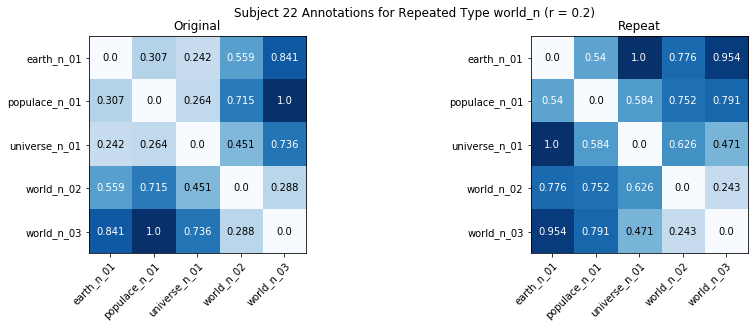

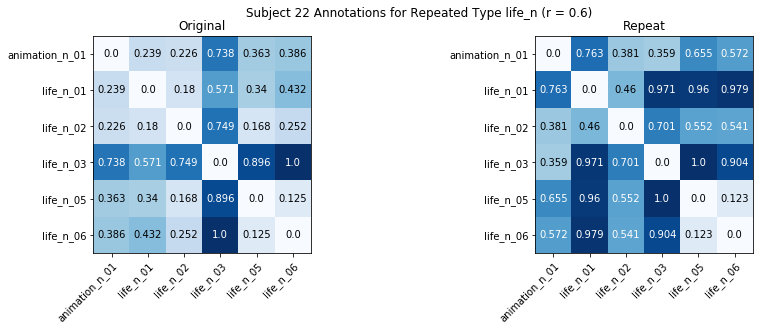

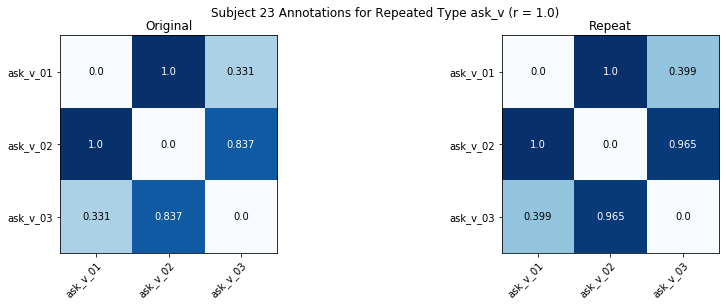

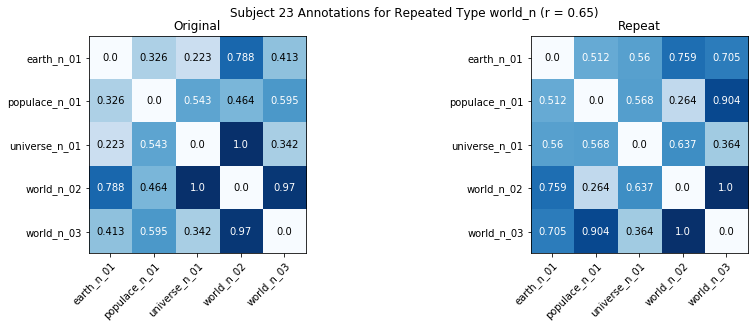

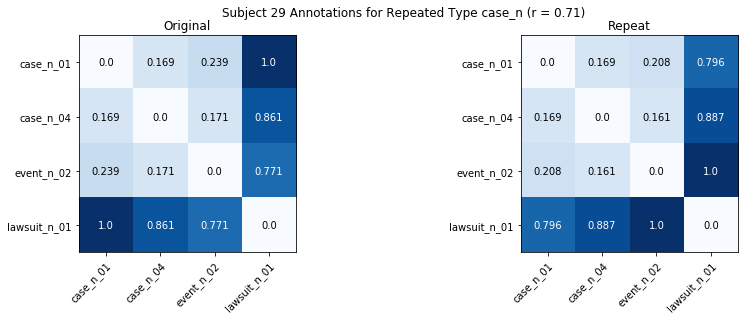

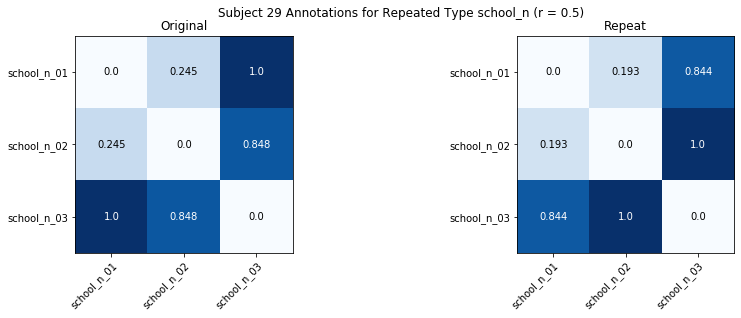

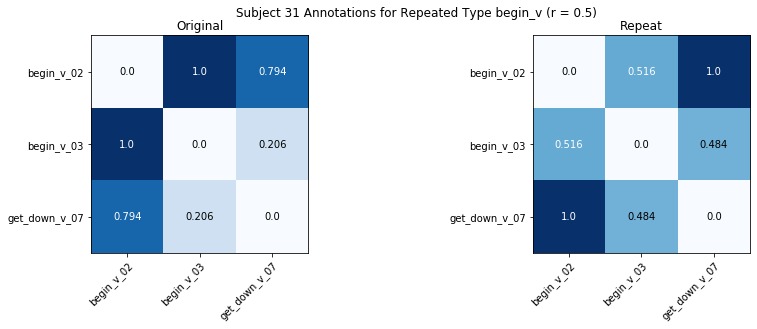

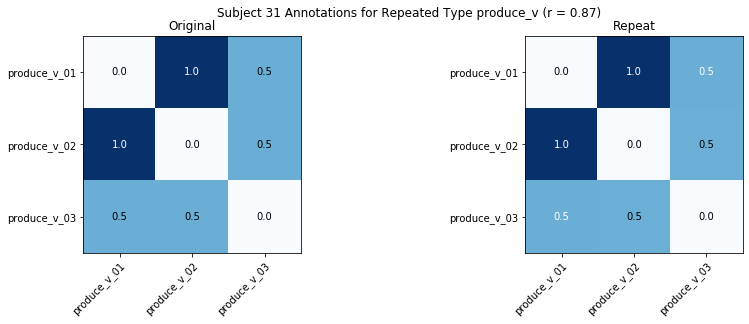

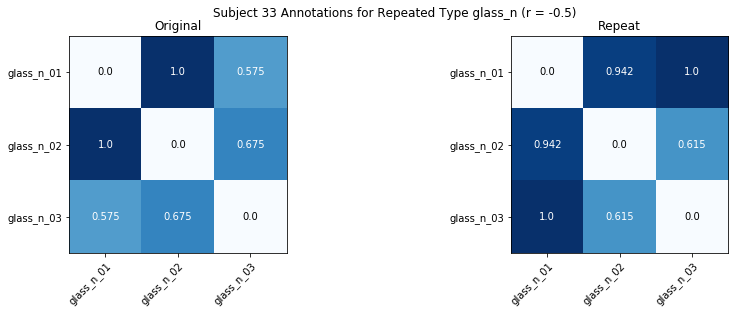

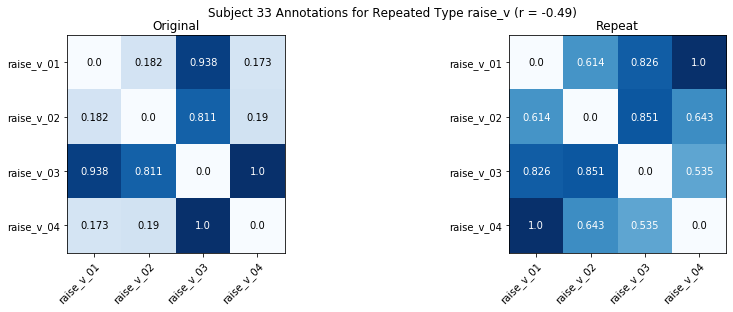

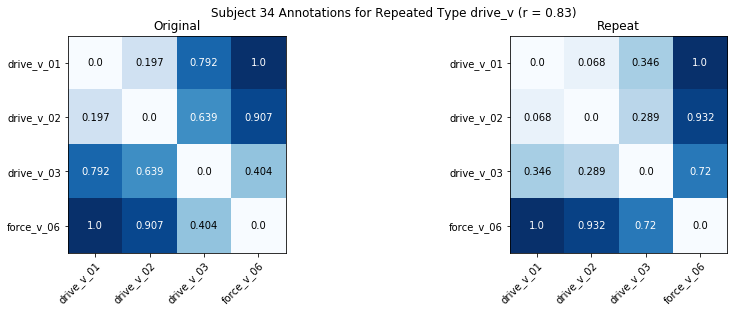

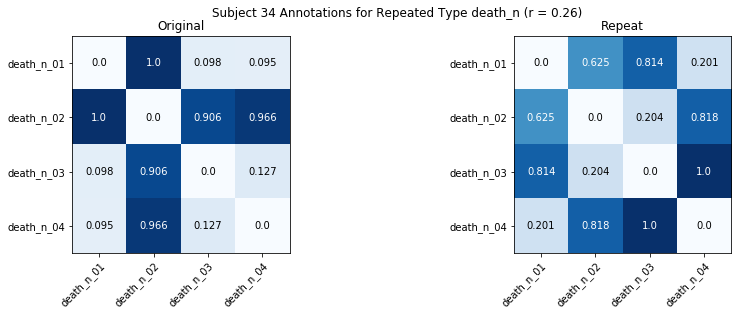

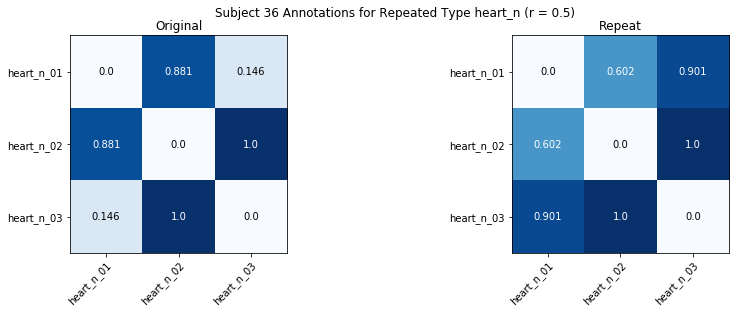

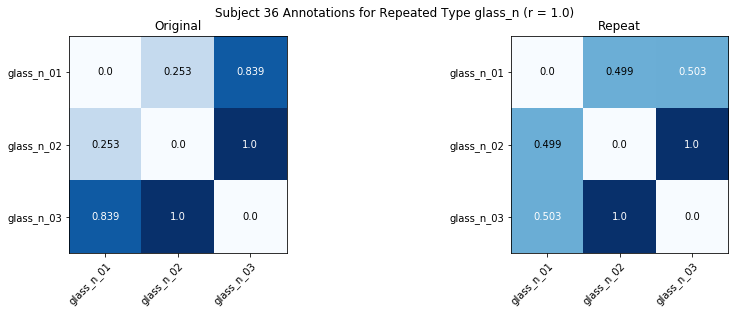

In [8]:
repeat_corr = plot_all_repeats(results, users, random_baseline = True, db = db)

## Shared Words

All subjects received a set of homonymous words. It appears there's some consistency in the results for foot, table, degree, and plane, but model and right were harder to distinguish.

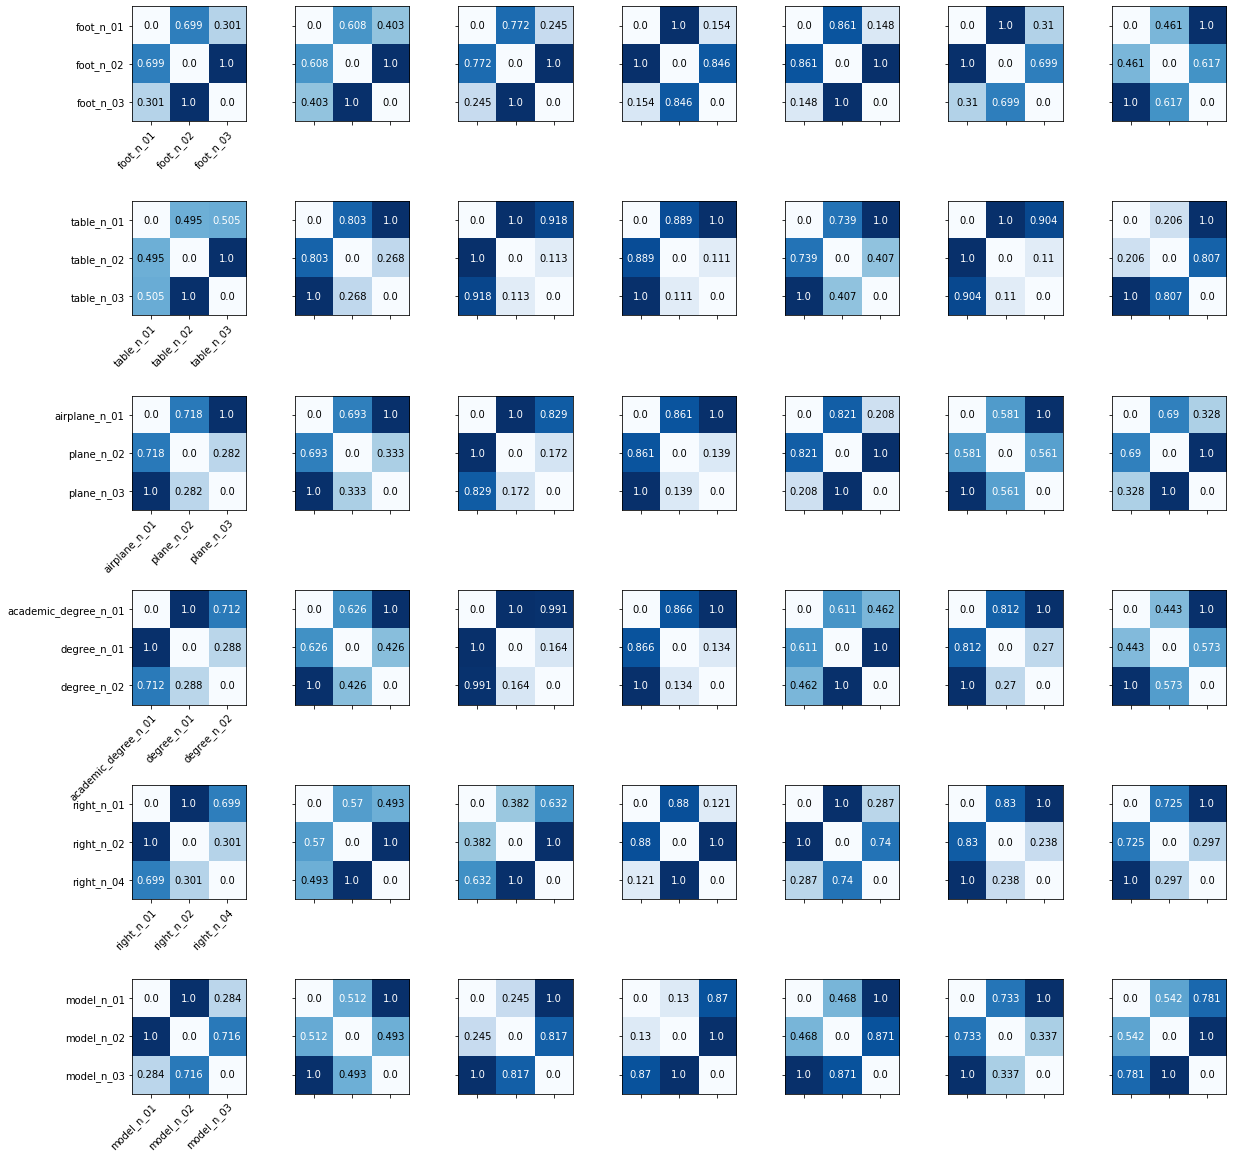

In [9]:
plot_all_shared(results, users)

In [10]:
shared_corrs = group_consistency(results, users, random_baseline = True)

Hold One Out Correlation for User 22 -0.018920699072759617
Hold One Out Correlation for User 23 0.6937589660011858
Hold One Out Correlation for User 29 0.5465979732130555
Hold One Out Correlation for User 31 0.5402910735221357
Hold One Out Correlation for User 33 0.13664949330326387
Hold One Out Correlation for User 34 0.41625537960071146
Hold One Out Correlation for User 36 -0.19130929062456942
Random Baseline -0.062017846960712074


In [ ]:
shared_minus_4 = 

In [11]:
consistency = pd.DataFrame({'Group Consistency': shared_corrs, 'Self Consistency': repeat_corr})
consistency

,Group Consistency,Self Consistency
0,-0.018921,0.459407
1,0.693759,0.734160
2,0.546598,0.655462
3,0.540291,0.850841
4,0.136649,-0.210084
5,0.416255,0.342105
6,-0.191309,0.647059
7,-0.062018,-0.567010


Random Baseline

In [12]:
import seaborn as sns

In [13]:
randoms_self = []
for i in range(100):
    first_trial_dim = random_num_senses(db)
    second_trial_dim = random_num_senses(db)
    random_orig = np.array([create_random_symmetric_mtx(first_trial_dim), create_random_symmetric_mtx(second_trial_dim)])
    random_repeat = np.array([create_random_symmetric_mtx(first_trial_dim), create_random_symmetric_mtx(second_trial_dim)])
    random_corrs = mtx_correlation(random_orig, random_repeat)
    randoms_self.append(random_corrs)

Text(0.5, 0, 'Spearman Correlation')

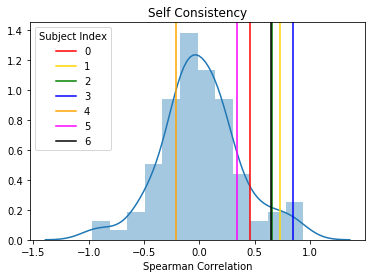

In [27]:
sns.distplot(randoms_self)
parts = consistency.iloc[:7]['Self Consistency']
colors = ['red', 'gold', 'green', 'blue', 'orange', 'magenta', 'black']
for i in range(len(parts)):
    plt.axvline(parts[i], c = colors[i], label = i)
plt.legend(title = 'Subject Index')
plt.title("Self Consistency")
plt.xlabel("Spearman Correlation")

In [86]:
shared_results_minus_4 = results[(results['trialType'] == 'shared') &\
                                 (results['userID'] != '-M3wWKZuvM6607THGsj3')]
users_minus_4 = users.drop(33)
group_minus_4 = group_consistency(shared_results_minus_4, users_minus_4)

Hold One Out Correlation for User 22 0.029432198557626067
Hold One Out Correlation for User 23 0.7820555616740641
Hold One Out Correlation for User 29 0.5339841738312158
Hold One Out Correlation for User 31 0.4719663268705037
Hold One Out Correlation for User 34 0.40469273016735846
Hold One Out Correlation for User 36 -0.27435013655501445


In [87]:
random_group = [random_vs_all(shared_results_minus_4) for _ in range(100)]

In [89]:
import seaborn as sns

Text(0.5, 0, 'Spearman Correlation')

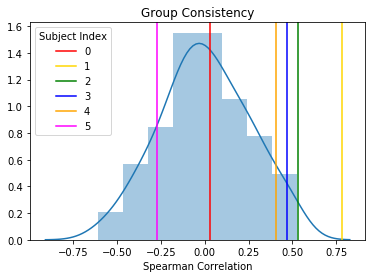

In [92]:
sns.distplot(random_group)
parts = group_minus_4
colors = ['red', 'gold', 'green', 'blue', 'orange', 'magenta', 'black']
for i in range(len(parts)):
    plt.axvline(parts[i], c = colors[i], label = i)
plt.legend(title = 'Subject Index')
plt.title("Group Consistency")
plt.xlabel("Spearman Correlation")

## MDS for Shared Trials

In [35]:
all_shared_defs = display_sense_definitions(results, 'shared')

7


,Sense,Type,Definition
212,foot_n_01,foot_n,the part of the leg of a human being below the ankle joint
213,foot_n_02,foot_n,a linear unit of length equal to 12 inches or a third of a yard
214,foot_n_03,foot_n,the lower part of anything


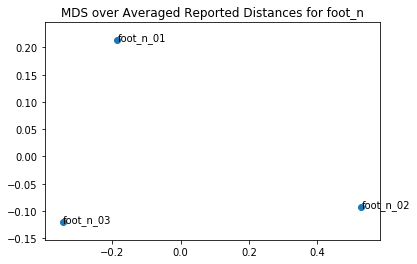

In [37]:
plot_individual_mds(results, 'foot_n', 'shared', users, db, all_shared_defs)

,Sense,Type,Definition
215,table_n_01,table_n,a set of data arranged in rows and columns
216,table_n_02,table_n,a piece of furniture having a smooth flat top that is usually supported by one or more vertical legs
217,table_n_03,table_n,a piece of furniture with tableware for a meal laid out on it


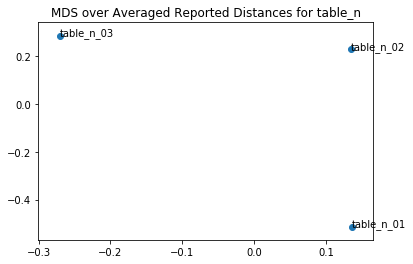

In [19]:
plot_individual_mds(results, 'table_n', 'shared', users, db, all_shared_defs)

,Sense,Type,Definition
218,airplane_n_01,plane_n,an aircraft that has a fixed wing and is powered by propellers or jets
219,plane_n_02,plane_n,(mathematics) an unbounded two-dimensional shape
220,plane_n_03,plane_n,a level of existence or development


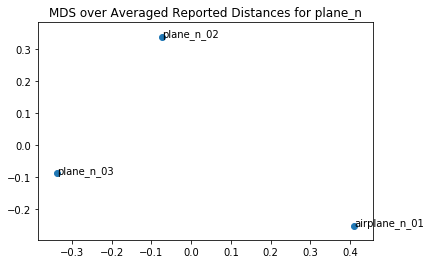

In [21]:
plot_individual_mds(results, 'plane_n', 'shared', users, db, all_shared_defs)

,Sense,Type,Definition
221,academic_degree_n_01,degree_n,an award conferred by a college or university signifying that the recipient has satisfactorily completed a course of study
222,degree_n_01,degree_n,a position on a scale of intensity or amount or quality
223,degree_n_02,degree_n,a specific identifiable position in a continuum or series or especially in a process


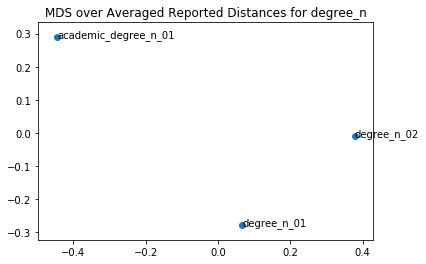

In [22]:
plot_individual_mds(results, 'degree_n', 'shared', users, db, all_shared_defs)

,Sense,Type,Definition
224,right_n_01,right_n,an abstract idea of that which is due to a person or governmental body by law or tradition or nature; ; - Eleanor Roosevelt
225,right_n_02,right_n,location near or direction toward the right side; i.e. the side to the south when a person or object faces east
226,right_n_04,right_n,those who support political or social or economic conservatism; those who believe that things are better left unchanged


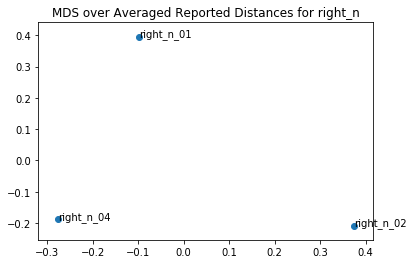

In [23]:
plot_individual_mds(results, 'right_n', 'shared', users, db, all_shared_defs)

,Sense,Type,Definition
227,model_n_01,model_n,a hypothetical description of a complex entity or process
228,model_n_02,model_n,a type of product
229,model_n_03,model_n,a person who poses for a photographer or painter or sculptor


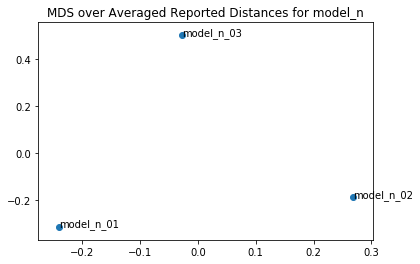

In [24]:
plot_individual_mds(results, 'model_n', 'shared', users, db, all_shared_defs)